<a href="https://colab.research.google.com/github/ASWATHI-A123/ASWATHI-A/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("/StudentsPerformance.csv")

# **QUESTION 1**

In [23]:
count=data['gender'].value_counts().reset_index()
count.columns=["Gender","Count"]
count

,Gender,Count
0,female,518
1,male,482


# **QUESTION 2**

In [24]:
prnt_edu=data['parental level of education'].value_counts().reset_index()
prnt_edu.columns=['Degree','Count']
prnt_edu

,Degree,Count
0,some college,226
1,associate's degree,222
2,high school,196
3,some high school,179
4,bachelor's degree,118
5,master's degree,59


In [25]:
import plotly.express as px
px.bar(prnt_edu, x = "Degree", y = "Count", 
       color_continuous_scale = "jet", 
       color = "Count", text = "Count", 
       title = "Students' Parental Level of Education")

Majority of parents having level of education at some college level and associate degree level.Among the 1000 parents only 59 have master's degree.

# **QUESTION 3**

# Average Score by Gender

In [26]:
scores_avg=data.groupby(['gender','test preparation course'])['math score','reading score','writing score']
print(scores_avg)

<ipython-input-26-c4818ae325d0>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [27]:
gender_mean=data.groupby('gender')[['math score','reading score','writing score']].mean().round(2)
gender_mean


,math score,reading score,writing score
gender,,,
female,63.38,72.59,72.47
male,68.82,65.55,63.45


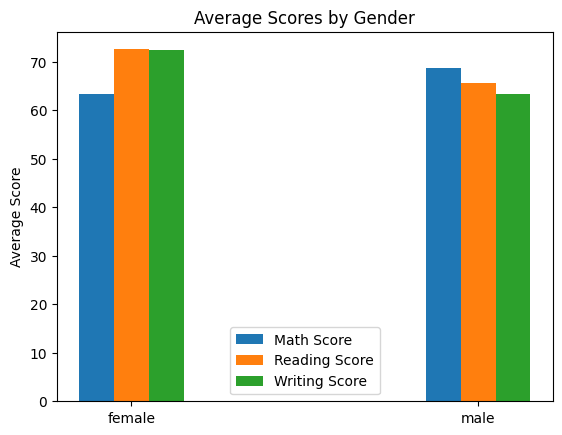

In [28]:

genders = gender_mean.index
math_scores = gender_mean['math score']
reading_scores = gender_mean['reading score']
writing_scores = gender_mean['writing score']
x = range(len(genders))
bar_width = 0.1
plt.bar(x, math_scores, width=bar_width, label='Math Score')
plt.bar([i + bar_width for i in x], reading_scores, width=bar_width, label='Reading Score')
plt.bar([i + 2 * bar_width for i in x], writing_scores, width=bar_width, label='Writing Score')
plt.xticks([i + bar_width for i in x], genders)
plt.ylabel('Average Score')
plt.title('Average Scores by Gender')
plt.legend()
plt.show()

INFERENCE: Females score more than males in both reading and writing.Whereas males score more than females in maths

# Average Score by Test preparation course

In [29]:
tpc_mean=data.groupby('test preparation course').mean().round(2)
tpc_mean

<ipython-input-29-e8a0f8d2e7d9>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,math score,reading score,writing score
test preparation course,,,
completed,69.97,74.18,74.68
none,63.79,66.42,64.46


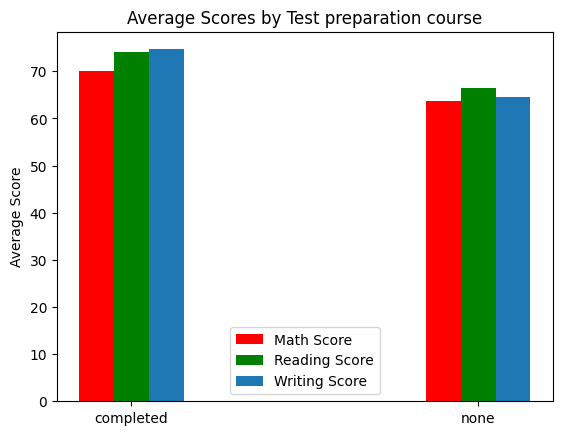

In [30]:
tpc = tpc_mean.index
math_scores = tpc_mean['math score']
reading_scores = tpc_mean['reading score']
writing_scores = tpc_mean['writing score']
x = range(len(tpc))
bar_width = 0.1
plt.bar(x, math_scores, width=bar_width, label='Math Score',color='red')
plt.bar([i + bar_width for i in x], reading_scores, width=bar_width, label='Reading Score',color='green')
plt.bar([i + 2 * bar_width for i in x], writing_scores, width=bar_width, label='Writing Score')
plt.xticks([i + bar_width for i in x], tpc)
plt.ylabel('Average Score')
plt.title('Average Scores by Test preparation course')
plt.legend()
plt.show()

INFERENCE:The average score for all the three that is for maths,reading as well as writing is more for those students who completed the test preparation course than that of not completed the course.

# **QUESTION 4**

# Score variation based on gender

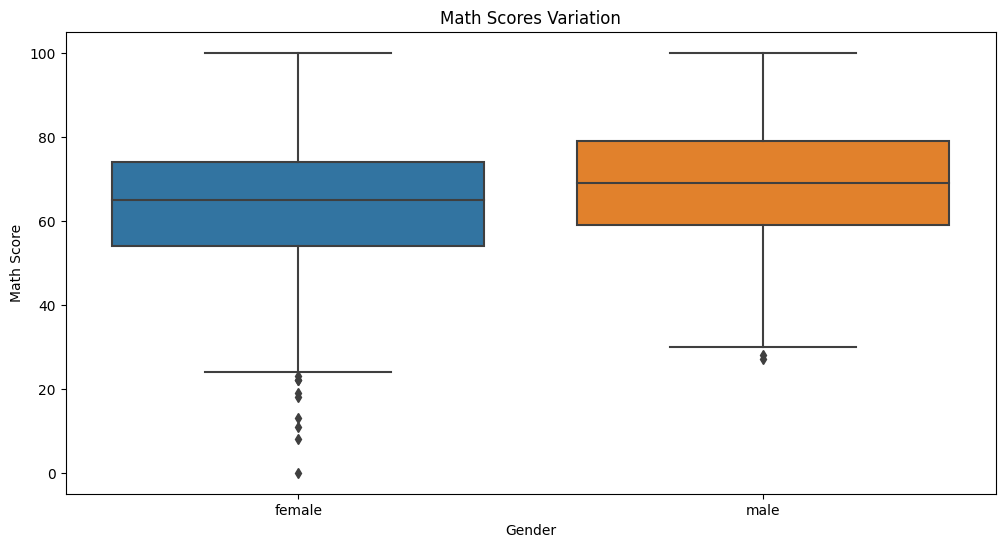

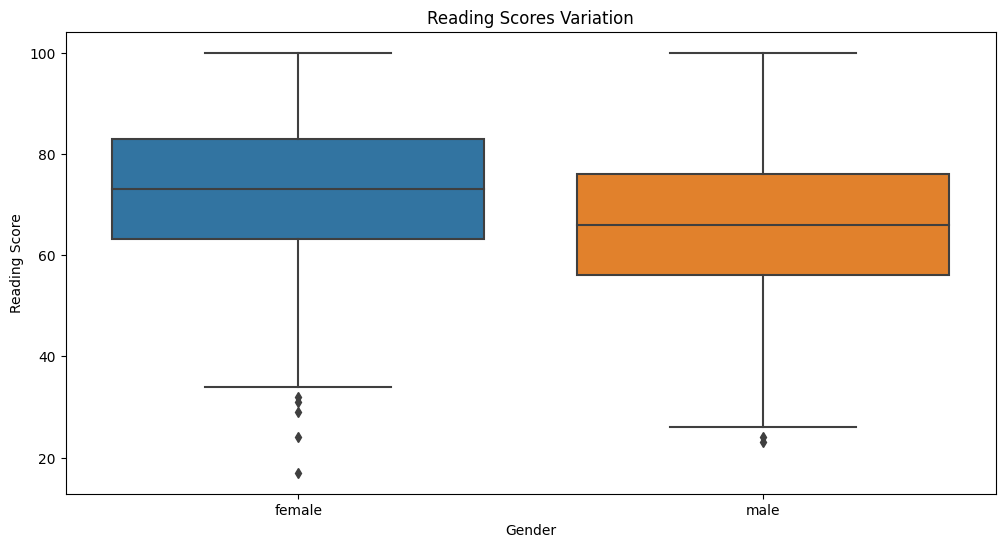

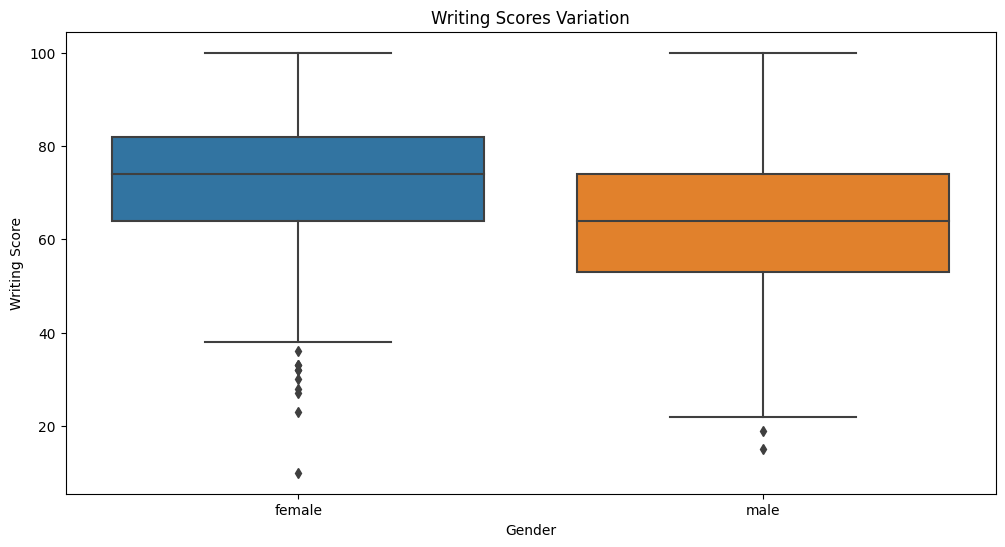

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='gender', y='math score')
plt.title('Math Scores Variation')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

# box plot for reading scores
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='gender', y='reading score')
plt.title('Reading Scores Variation')
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.show()

# Box plot for writing scores
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='gender', y='writing score')
plt.title('Writing Scores Variation')
plt.xlabel('Gender')
plt.ylabel('Writing Score')
plt.show()

INFERENCE:The outliers are more in females in all the three scores variations.

# Score variation based on Test preparation course

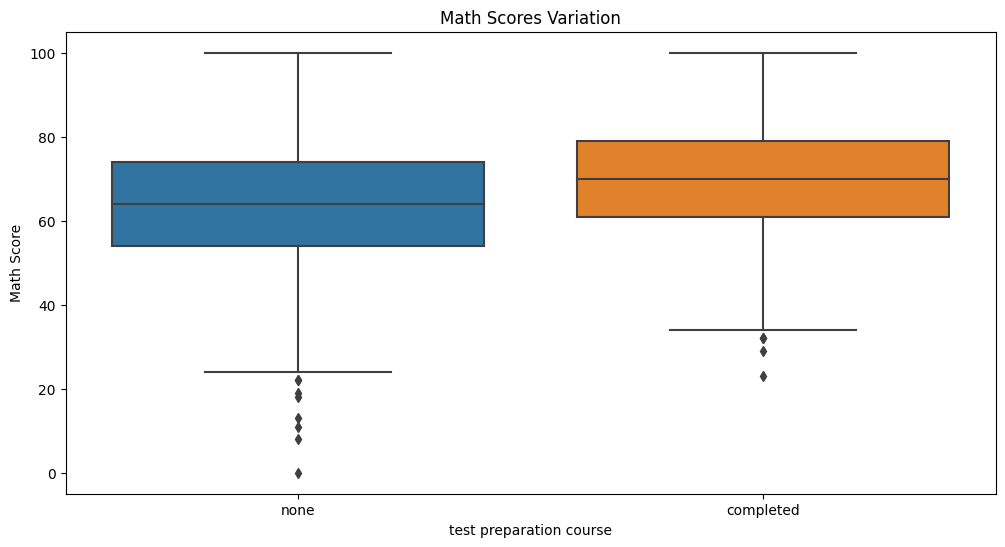

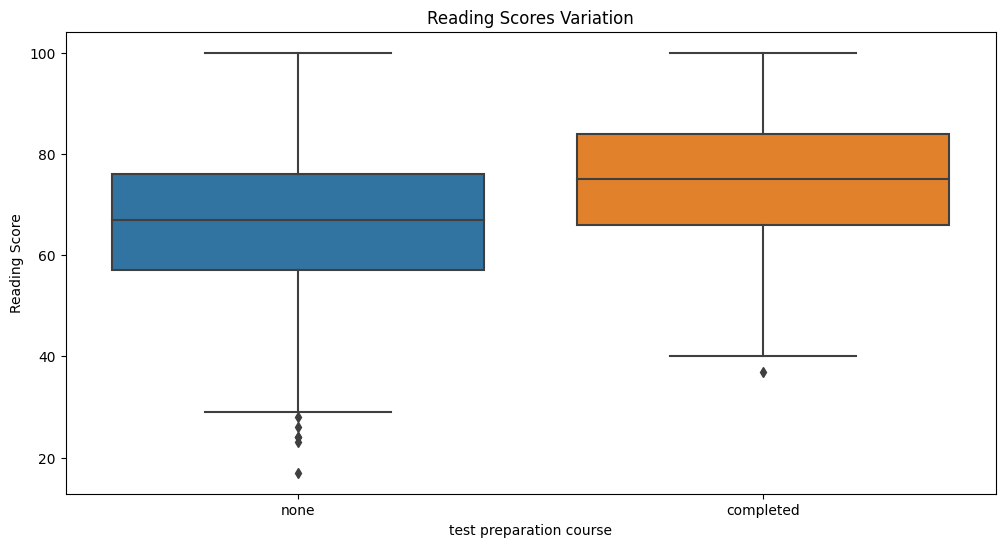

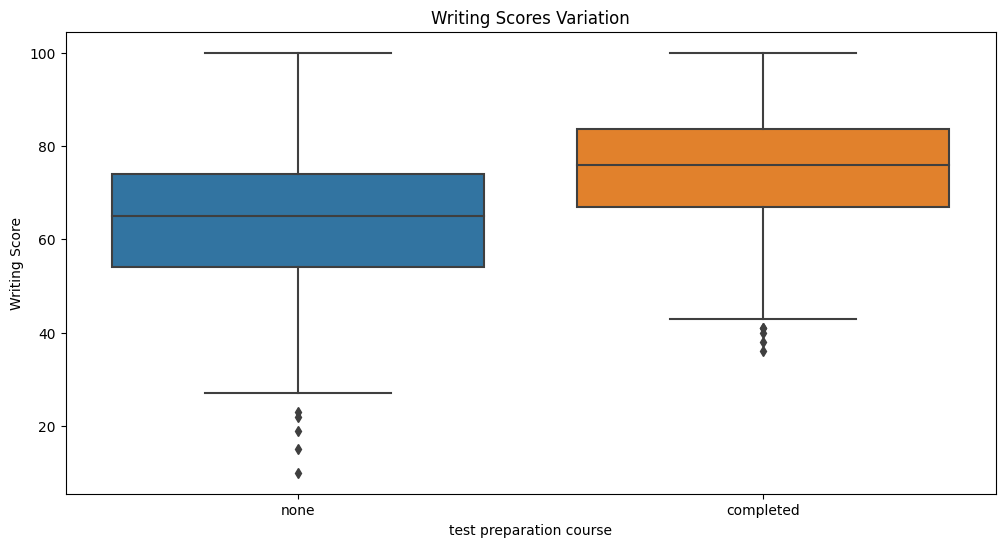

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='test preparation course', y='math score')
plt.title('Math Scores Variation')
plt.xlabel('test preparation course')
plt.ylabel('Math Score')
plt.show()

# box plot for reading scores
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='test preparation course', y='reading score')
plt.title('Reading Scores Variation')
plt.xlabel('test preparation course')
plt.ylabel('Reading Score')
plt.show()

# Box plot for writing scores
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='test preparation course', y='writing score')
plt.title('Writing Scores Variation')
plt.xlabel('test preparation course')
plt.ylabel('Writing Score')
plt.show()

# **QUESTION 5**

It can be achieved by the following steps: 

1.Sort the students' data based on their math scores in descending order.

2.Calculate the cutoff score that corresponds to the top 25% of students.

3.Identify the students who have math scores higher than or equal to the cutoff score.

4.Assign the bonus points to those students.

In [33]:

# Sort the data based on math scores in descending order
sorted_data = data.sort_values('math score', ascending=False)
sorted_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
2,female,group B,some high school,free/reduced,none,18,32,28
51,female,group C,some high school,free/reduced,none,13,41,51
3,female,group B,some college,standard,none,11,38,32
1,female,group B,high school,free/reduced,none,8,24,23


In [34]:
# Calculate the cutoff score for the top 25% of students
cutoff_index = int(len(sorted_data) * 0.25)
cutoff_score = sorted_data.iloc[cutoff_index]['math score']
# Identify the students with scores higher than or equal to the cutoff score
top_students = sorted_data[sorted_data['math score'] >= cutoff_score]
top_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
851,male,group D,some college,standard,completed,77,62,62
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64
421,female,group C,some college,free/reduced,none,77,90,91
